## import 요약

In [73]:
import os
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras import datasets
from keras import backend
from keras.utils import np_utils

import numpy as np

from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
 
import matplotlib.pyplot as plt

from omegaconf import OmegaConf

from kerasapp.keras import plot_loss, plot_acc
from kerasapp.Sfile import unique_filename

%matplotlib inline

## MMIST 분류 ANN 모델

In [8]:
def ANN_seq_func(Nin, Nh, Nout):
    """_summary_

    Args:
        Nin (_type_): input 
        Nh (_type_): hidden layer 
        Nout (_type_): output  

    Returns:
        _type_: classificaiton model
    """
    model = Sequential()
    model.add(Dense(Nh, input_dim = (Nin, ), activation = 'relu'))
    model.add(Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
class ANN_seq_classification(Sequential):
    def __init__(self, input, hidden, output):
        super().__init__()
        self.add(Dense(hidden, activation='relu', input_shape=(input, )))
        self.add(Dropout(0.3))
        self.add(Dense(output, activation='softmax'))
        self.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [10]:
def data_func_classification():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    L, Height, Width = X_train.shape
    X_train = X_train.reshape(-1, Width * Height)
    X_test = X_test.reshape(-1, Width * Height)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)
    
    

In [11]:
args = {
    "input_dim" : 784, # 28 * 28
    "hidden_dim" : 128,
    "output_dim" : 10,
    "epochs" : 20,
    "batch_size" : 64,
    "v_split" : 0.2
}

args = OmegaConf.create(args)

In [12]:

model = ANN_seq_classification(args.input_dim, args.hidden_dim, args.output_dim)
(X_train, Y_train), (X_test, Y_test)= data_func_classification()

In [13]:
history = model.fit(X_train, Y_train, epochs=args.epochs, batch_size=args.batch_size, \
    validation_split=args.v_split)


Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.4005 - accuracy: 0.8846 - val_loss: 0.1863 - val_accuracy: 0.9465
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2045 - accuracy: 0.9402 - val_loss: 0.1440 - val_accuracy: 0.9584
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1586 - accuracy: 0.9539 - val_loss: 0.1162 - val_accuracy: 0.9653
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1323 - accuracy: 0.9603 - val_loss: 0.1085 - val_accuracy: 0.9671
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.9649 - val_loss: 0.0987 - val_accuracy: 0.9701
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9681 - val_loss: 0.0925 - val_accuracy: 0.9730
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9728 - val_loss: 0.0855 - val_accuracy: 0.9756
Epoch 

In [14]:
performance_test = model.evaluate(X_test, Y_test, batch_size=args.batch_size)
print(f"Test loss and Accuracy : {performance_test}")

157/157 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9786
Test loss and Accuracy : [0.07922538369894028, 0.978600025177002]


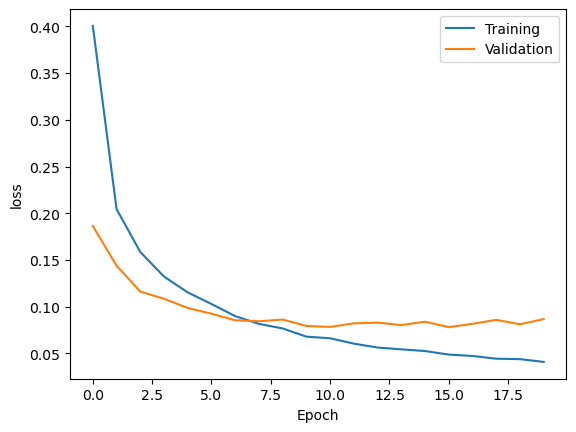

In [15]:
plot_loss(history)
plt.show()

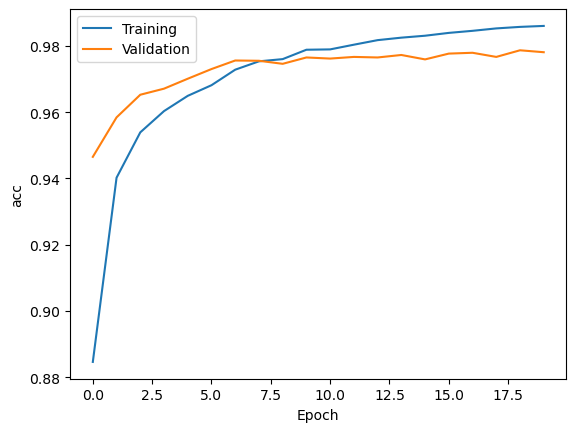

In [16]:
plot_acc(history)
plt.show()

## 보스턴 집값 예측(회귀) ANN 구현

In [17]:
from sklearn.preprocessing import MinMaxScaler
from kerasapp.keras import plot_loss

In [18]:
class ANN_seq_regression(Sequential):
    def __init__(self, input, hidden, output):
        super().__init__()
        self.add(Dense(hidden, activation='relu', input_shape=(input, )))
        # self.add(Dropout(0.3))
        self.add(Dense(output))
        self.compile(loss='mse', optimizer='adam' ,metrics=['accuracy'])

In [19]:
def data_func_boston():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = MinMaxScaler()  
    X_train = scaler.fit_transform(X_train)
    X_tese = scaler.fit_transform(X_test)
    return (X_train, y_train), (X_test, y_test)

In [20]:
args1 = {
    "input" : 13,
    "hidden" : 64,
    "output" : 1,
    "batch_size" : 32,
    "epochs" : 100,
    "v_split" : 0.3
}

In [21]:
args1 = OmegaConf.create(args1)

4/4 [==============================] - 0s 1ms/step - loss: 7904089.5000 - accuracy: 0.0000e+00

 Test Loss : 7904089.50


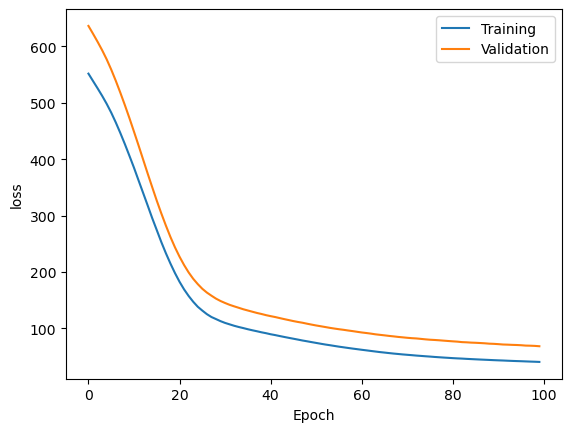

In [22]:
model1 = ANN_seq_regression(args1.input, args1.hidden, args1.output)
(X_train, y_train), (X_test, y_test) = data_func_boston()
history1 = model1.fit(X_train, y_train, epochs=args1.epochs, batch_size=args1.batch_size,\
                        validation_split=args1.v_split, verbose=0)
performance_test1 = model1.evaluate(X_test, y_test, batch_size=args1.batch_size)
print(f"\n Test Loss : {performance_test1[0]:.2f}") # evaluate = [loss, accuracy]

plot_loss(history1)
plt.show()

회귀 문제는 정확한 답이 없기 때문에 Accuracy에 대한 개념을 사용할 수 없음

## DNN

In [2]:
args2 = {
    "input" : 784,
    "hidden" : [100, 50], # hidden layer 2개
    "output" : 10,
    "epochs" : 100,
    "batch_size" : 64,
    "v_split" : 0.3
}

In [3]:
args2 = OmegaConf.create(args2)

In [4]:
class DNN_classificaiton(Sequential):
    def __init__(self, input, hidden, output):
        super().__init__()
        self.add(Dense(hidden[0], activation='relu', input_shape=(input,), name='Hidden-1'))
        self.add(Dense(hidden[1], activation='relu', name='Hidden-2'))
        self.add(Dense(output, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        

In [5]:
model3 = DNN_classificaiton(args2.input, args2.hidden, args2.output)
(X_train, y_train), (X_test, y_test)= data_func_classification()

NameError: name 'data_func_classification' is not defined

In [35]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model3.fit(X_train, y_train, epochs=args2.epochs, batch_size=args2.batch_size, \
                        validation_split=args2.v_split, verbose=0, callbacks=[callbacks])


In [36]:
performance_test2 = model3.evaluate(X_test, y_test)
print(f"Test Loss : {performance_test2[0]:.2f}, Accuracy : {performance_test2[1]:.2f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.9771
Test Loss : 0.15, Accuracy : 0.98


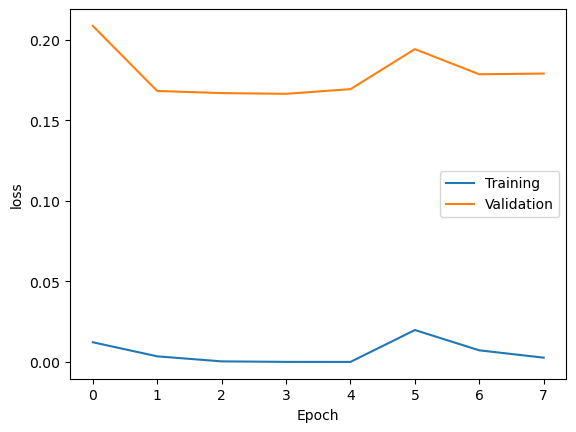

In [37]:
plot_loss(history)
plt.show()

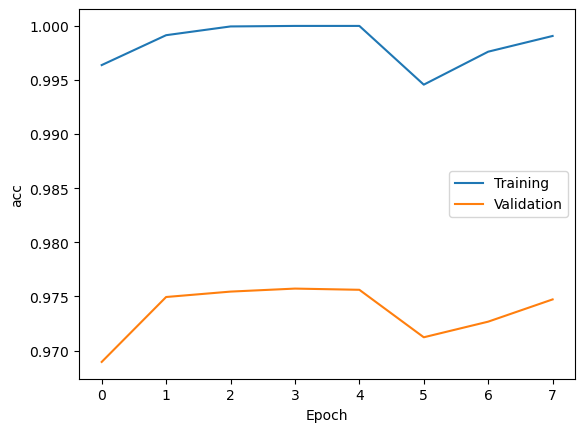

In [38]:
plot_acc(history)
plt.show()

## 컬러 이미지 Classification DNN

In [21]:
def data_func_color_classification():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    L, Width, Height, Color = X_train.shape
    X_train = X_train.reshape(-1, Width * Height * Color)
    X_test = X_test.reshape(-1, Width * Height * Color)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, y_train), (X_test, y_test)

In [22]:
class DNN_Color_Classificaiton(Sequential):
    def __init__(self, input, hidden, dropout, output):
        super().__init__()
        self.add(Dense(hidden[0], activation='relu', input_shape=(input,), name="hidden-1"))
        self.add(Dropout(dropout[0]))
        self.add(Dense(hidden[1], activation='relu', name="hidden-2"))
        self.add(Dropout(dropout[1]))
        self.add(Dense(output, activation='softmax'))
        self.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [34]:
args3 = {
    "hidden" : [100, 50],
    "output" : 10,
    "dropout" : [0.1, 0.1],
    "epochs" : 100,
    "batch_size" : 128
}

In [35]:
args3 = OmegaConf.create(args3)
(X_train, y_train), (X_test, y_test)= data_func_color_classification() # X_train shape = ( 70000,)

In [36]:
model4 = DNN_Color_Classificaiton(X_train.shape[1], args3.hidden, args3Dropout, args3.output)

In [37]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss' ,patience=3)
history4 = model4.fit(X_train, y_train, epochs=args3.epochs, batch_size=args3.batch_size, \
                        validation_split=0.2, callbacks=[callbacks], verbose=1)

Epoch 1/100
313/313 [==============================] - 2s 6ms/step - loss: 2.0178 - accuracy: 0.2567 - val_loss: 1.8497 - val_accuracy: 0.3390
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8608 - accuracy: 0.3230 - val_loss: 1.8007 - val_accuracy: 0.3559
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8033 - accuracy: 0.3476 - val_loss: 1.7586 - val_accuracy: 0.3707
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7603 - accuracy: 0.3636 - val_loss: 1.7429 - val_accuracy: 0.3715
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7388 - accuracy: 0.3724 - val_loss: 1.6791 - val_accuracy: 0.3999
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7123 - accuracy: 0.3829 - val_loss: 1.6618 - val_accuracy: 0.4069
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.6959 - accuracy: 0.3876 - val_loss: 1.6440 - val_accuracy: 0.4129

In [38]:
model4_eval = model4.evaluate(X_test, y_test)
print(f"Evaluate score -> loss : {model4_eval[0]:.2f}, accuracy : {model4_eval[1]:.2f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.5245 - accuracy: 0.4494
Evaluate score -> loss : 1.52, accuracy : 0.45


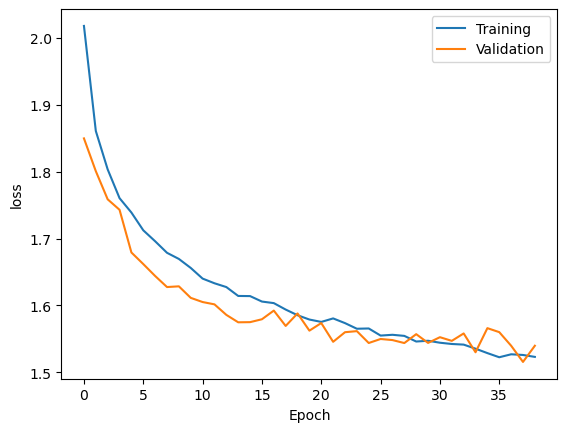

In [39]:
plot_loss(history4)
plt.show()

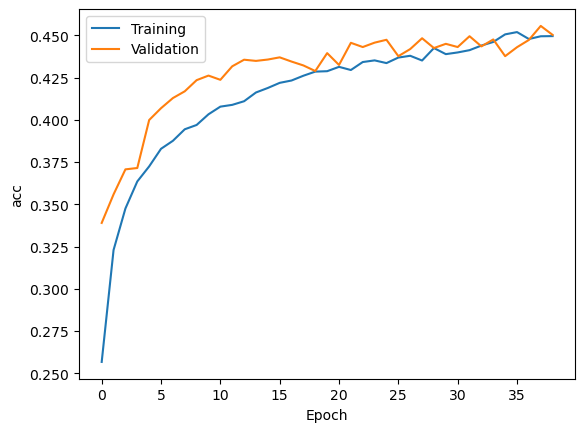

In [40]:
plot_acc(history4)
plt.show()

## CNN Mnist

In [118]:
class CNN_Classification(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        
        self.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, (3,3), activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2)))
        self.add(Dropout(0.3))
        self.add(Flatten())
        self.add(Dense(128, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(num_classes, activation='softmax'))
        
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
class DataSet():
    def __init__(self):
        nb_classes = 10
        
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]
        
        if backend.image_data_format() == "channels_first":
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
            
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, nb_classes)
        y_test = keras.utils.to_categorical(y_test, nb_classes)
        
        self.input_shape = input_shape
        self.nb_classes = nb_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [123]:
batch_size = 128
epochs = 10

data = DataSet()
model5 = CNN_Classification(data.input_shape, data.nb_classes)
history5 = model5.fit(data.x_train, data.y_train, batch_size=batch_size, epochs=epochs, \
                        validation_split=0.2, verbose=1, callbacks=[callbacks])
score = model5.evaluate(data.x_test, data.y_test)

print(f"Test loss : {score[0]}")
print(f"Test Acc : {score[1]}")

Epoch 1/10
375/375 [==============================] - 46s 121ms/step - loss: 0.2649 - accuracy: 0.9173 - val_loss: 0.0678 - val_accuracy: 0.9786
Epoch 2/10
375/375 [==============================] - 42s 112ms/step - loss: 0.0926 - accuracy: 0.9720 - val_loss: 0.0480 - val_accuracy: 0.9855
Epoch 3/10
375/375 [==============================] - 41s 110ms/step - loss: 0.0728 - accuracy: 0.9785 - val_loss: 0.0407 - val_accuracy: 0.9888
Epoch 4/10
375/375 [==============================] - 42s 111ms/step - loss: 0.0571 - accuracy: 0.9828 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 5/10
210/375 [===============>..............] - ETA: 18s - loss: 0.0473 - accuracy: 0.9851

: 

: 

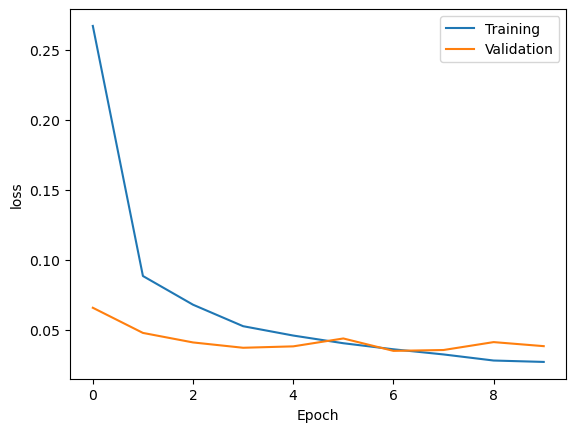

In [ ]:
plot_loss(history5)
plt.show()

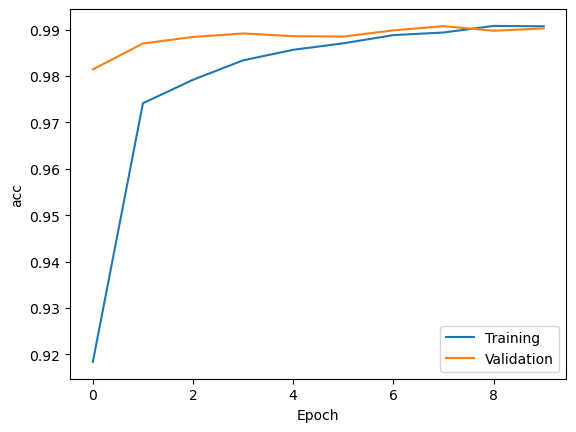

In [ ]:
plot_acc(history5)
plt.show()

## Cifar10 CNN

In [89]:
class CIFAR10_CNN(Model):
    def __init__(self, nb_classes):
        super(CIFAR10_CNN, self).__init__()
        self.nb_classes = nb_classes
        
        self.conv2D_A = Conv2D(32, kernel_size=(3,3), activation='relu')
        self.conv2D_B = Conv2D(64, (3,3), activation='relu')
        self.maxPooling2D_A = MaxPooling2D(pool_size=(2,2))
        self.dropout_A = Dropout(0.25)
        self.flatten = Flatten()
        
        self.dense_A = Dense(128, activation='relu')
        self.dropout_B = Dropout(0.5)
        self.dense_B = Dense(nb_classes, activation='softmax', name="preds")
        
    def call(self, x):
        h = self.conv2D_A(x)
        h = self.conv2D_B(h)
        h = self.maxPooling2D_A(h)
        h = self.dropout_A(h)
        h = self.flatten(h)
        
        h = self.dense_A(h)
        h = self.dropout_B(h)
        
        y = self.dense_B(h)
        
        return y
        

In [90]:
nb_classes = 10
model6 = CIFAR10_CNN(nb_classes=nb_classes)
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
class DataSet:
    def __init__(self, X, y, nb_classes, scaling=True, test_size=0.2, random_state=0):
        self.X = X
        self.add_channels()
        X = self.X
        
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, \
                                            test_size=test_size, random_state=random_state)
        print(X_train.shape, y_train.shape)
        
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        
        if scaling:
            scaler = MinMaxScaler()
            n = X_train.shape[0]
            X_train = scaler.fit_transform(X_train.reshape(n, -1)).reshape(X_train.shape)
            n = X_test.shape[0]
            X_test = scaler.fit_transform(X_test.reshape(n, -1)).reshape(X_test.shape)
            self.scaler = scaler
            
        print(f"X_train shape", X_train.shape)
        print(f"X_train samples", X_train.shape[0])
        print(f"X_test samples", X_test.shape[0])
        
        Y_train = np_utils.to_categorical(y_train, nb_classes)
        Y_test = np_utils.to_categorical(y_test, nb_classes)
        
        self.X_train, self.X_test = X_train, X_test
        self.Y_train, self.Y_test = Y_train, Y_test
        self.y_train, self.y_test = y_train, y_test
        
    def add_channels(self):
        X = self.X
        
        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape
            
            if X.image_dim_ordering() == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
                
            else:
                X = X.reshape(X.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
                
        else:
            input_shape = X.shape[1:] # channel is already included.
            
        self.X = X
        self.input_shape = input_shape
    

In [92]:
(X, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
nb_classes = 10
data = DataSet(X, y, nb_classes)
print('data.input_shape', data.input_shape)

(40000, 32, 32, 3) (40000, 1)
X_train shape (40000, 32, 32, 3)
X_train samples 40000
X_test samples 10000
data.input_shape (32, 32, 3)


In [93]:
epochs = 2
batch_size = 256
verbose = 1
callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history6 = model6.fit(data.X_train, data.Y_train, batch_size=batch_size, epochs=epochs, \
                        verbose=verbose, validation_data=(data.X_test, data.Y_test),\
                            callbacks=[callbacks])

Epoch 1/2
313/313 [==============================] - 49s 156ms/step - loss: 1.6946 - accuracy: 0.3853 - val_loss: 1.3028 - val_accuracy: 0.5369
Epoch 2/2
313/313 [==============================] - 47s 150ms/step - loss: 1.3462 - accuracy: 0.5217 - val_loss: 1.1400 - val_accuracy: 0.5937


In [106]:
class Machine():
    def __init__(self, X, y, nb_classes=2, fig=True):
        self.nb_classes = nb_classes
        self.set_data(X, y)
        self.set_model()
        self.fig = fig
        
    def set_data(self, X, y):
        nb_classes = self.nb_classes
        self.data = DataSet(X, y, nb_classes)
        print("data.input_shape", self.data.input_shape)
        
    def set_model(self):
        nb_classes = self.nb_classes
        data = self.data
        self.model = CIFAR10_CNN(nb_classes=nb_classes)
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    def fit(self, epochs=10, batch_size=128, verbose=1):
        data = self.data
        model = self.model
        
        history = model.fit(data.X_train, data.Y_train, epochs=epochs, batch_size=batch_size,
                            verbose=verbose, validation_data=(data.X_test, data.Y_test), \
                                callbacks=[callbacks])
        return history
    
    def run(self, epochs=250, batch_size=256, verbose=1):
        data = self.data
        model = self.model
        fig = self.fig
        
        history = self.fit(epochs=epochs, batch_size=batch_size, verbose=verbose)
        
        score = model.evaluate(data.X_test, data.Y_test, verbose=0)
        
        print("Confusion Matrix")
        Y_test_pred = model.predict(data.X_test, verbose=0)
        y_test_pred = np.argmax(Y_test_pred, axis=1)
        print(metrics.confusion_matrix(data.y_test, y_test_pred))
        
        print("Test score : ", score[0])
        print("Test accuracy : ", score[1])
        
        suffix = unique_filename('datetime')
        foldname = 'output_' + suffix
        os.makedirs(foldname)
        model.save(os.path.join(foldname, 'dl_model'), save_format='tf')
        print("Output results are saved in ", foldname)
        
        if fig:
            plt.figure(figsize=(12,4))
            plt.subplot(1,2,1)
            plot_acc(history.history)
            plt.subplot(1,2,2)
            plot_loss(history.history)
            plt.show()
            
        self.history = history
        
        return foldname
        

In [107]:
class MyMachine(Machine):
    def __init__(self):
        (X, y), (x_test, y_test) = datasets.cifar10.load_data()
        super(MyMachine, self).__init__(X, y, nb_classes=10)


In [109]:
def main():
    m = MyMachine()
    m.run(epochs=100)

In [110]:
main()

(40000, 32, 32, 3) (40000, 1)
X_train shape (40000, 32, 32, 3)
X_train samples 40000
X_test samples 10000
data.input_shape (32, 32, 3)
Epoch 1/100
157/157 [==============================] - 56s 353ms/step - loss: 1.7566 - accuracy: 0.3582 - val_loss: 1.4091 - val_accuracy: 0.5019
Epoch 2/100
157/157 [==============================] - 54s 347ms/step - loss: 1.4113 - accuracy: 0.4924 - val_loss: 1.2163 - val_accuracy: 0.5630
Epoch 3/100
157/157 [==============================] - 53s 339ms/step - loss: 1.2504 - accuracy: 0.5559 - val_loss: 1.1142 - val_accuracy: 0.6091
Epoch 4/100
157/157 [==============================] - 53s 335ms/step - loss: 1.1577 - accuracy: 0.5931 - val_loss: 1.0501 - val_accuracy: 0.6281
Epoch 5/100
157/157 [==============================] - 52s 334ms/step - loss: 1.0854 - accuracy: 0.6166 - val_loss: 1.0335 - val_accuracy: 0.6357
Epoch 6/100
157/157 [==============================] - 53s 339ms/step - loss: 1.0338 - accuracy: 0.6337 - val_loss: 1.0098 - val_accura

: 

: 

In [98]:
class Fashion_Mnist(Model):
    def __init__(self, nb_classes):
        super(Fashion_Mnist, self).__init__()
        self.nb_classes = nb_classes
        
        self.conv2D_A = Conv2D(28, kernel_size=(3,3), activation='relu')
        self.conv2D_B = Conv2D(64, (3,3), activation='relu')
        self.maxPooling2D_A = MaxPooling2D(pool_size=(2,2))
        self.dropout_A = Dropout(0.25)
        self.flatten = Flatten()
        
        self.dense_A = Dense(128, activation='relu')
        self.dropout_B = Dropout(0.5)
        self.dense_B = Dense(nb_classes, activation='softmax', name="preds")
        
    def call(self, x):
        h = self.conv2D_A(x)
        h = self.conv2D_B(h)
        h = self.maxPooling2D_A(h)
        h = self.dropout_A(h)
        h = self.flatten(h)
        
        h = self.dense_A(h)
        h = self.dropout_B(h)
        
        y = self.dense_B(h)
        
        return y
        

In [99]:
class Machine_FMnist():
    def __init__(self, X, y, nb_classes=2, fig=True):
        self.nb_classes = nb_classes
        self.set_data(X, y)
        self.set_model()
        self.fig = fig
        
    def set_data(self, X, y):
        nb_classes = self.nb_classes
        self.data = DataSet(X, y, nb_classes)
        print("data.input_shape", self.data.input_shape)
        
    def set_model(self):
        nb_classes = self.nb_classes
        data = self.data
        self.model = Fashion_Mnist(nb_classes=nb_classes)
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    def fit(self, epochs=10, batch_size=128, verbose=1):
        data = self.data
        model = self.model
        
        history = model.fit(data.X_train, data.Y_train, epochs=epochs, batch_size=batch_size,
                            verbose=verbose, validation_data=(data.X_test, data.Y_test))
        return history
    
    def run(self, epochs=100, batch_size=128, verbose=1):
        data = self.data
        model = self.model
        fig = self.fig
        
        history = self.fit(epochs=epochs, batch_size=batch_size, verbose=verbose)
        
        score = model.evaluate(data.X_test, data.Y_test, verbose=0)
        
        print("Confusion Matrix")
        Y_test_pred = model.predict(data.X_test, verbose=0)
        y_test_pred = np.argmax(Y_test_pred, axis=1)
        print(metrics.confusion_matrix(data.y_test, y_test_pred))
        
        print("Test score : ", score[0])
        print("Test accuracy : ", score[1])
        
        suffix = unique_filename('datetime')
        foldname = 'output_' + suffix
        os.makedirs(foldname)
        model.save(os.path.join(foldname, 'dl_model'), save_format='tf')
        print("Output results are saved in ", foldname)
        
        if fig:
            plt.figure(figsize=(12,4))
            plt.subplot(1,2,1)
            plot_acc(history)
            plt.subplot(1,2,2)
            plot_loss(history)
            plt.show()
            
        self.history = history
        
        return foldname
        

In [100]:
class MyMachine_Fmnist(Machine_FMnist):
    def __init__(self):
        (X, y), (x_test, y_test) = datasets.fashion_mnist.load_data()
        super(MyMachine_Fmnist, self).__init__(X, y, nb_classes=10)


In [101]:
def main_mnist():
    m = MyMachine_Fmnist()
    m.run(epochs=50)

In [ ]:
main_mnist()

In [103]:
(X, y), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [104]:
X.shape

(60000, 28, 28)

In [105]:
type(X)

numpy.ndarray